In [101]:
import pygad
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

## Creating a Neural Network

In [70]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[2]),
    tf.keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(2, activation="softmax")
])

## Creating Genetic Algorithm

In [71]:
import pygad.kerasga

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

initial_population = keras_ga.population_weights

In [72]:
initial_population

[array([-0.20794782, -0.15705566, -0.04976766, ...,  0.10155198,
         0.        ,  0.        ], dtype=float32),
 array([-0.17114755, -0.54694623, -0.03478276, ...,  1.06486499,
         0.32619249, -0.37649502]),
 array([-0.18017088,  0.44167039,  0.50293702, ...,  0.97560053,
         0.37210358,  0.39819095]),
 array([ 0.25000349, -0.94666066, -0.6106754 , ...,  0.0648768 ,
        -0.66279519,  0.81723916]),
 array([-0.29476845,  0.61164856, -0.55548453, ...,  0.39276894,
         0.77983724, -0.59047188]),
 array([ 0.61526094,  0.12012379, -0.10850081, ..., -0.76550132,
         0.12000628,  0.0287136 ]),
 array([-0.86736015, -0.81749425,  0.36116127, ..., -0.28518539,
        -0.85677234, -0.35868747]),
 array([ 0.73352617, -1.0753494 ,  0.89204004, ..., -0.82718333,
         0.52924702, -0.7955891 ]),
 array([-0.22064159,  0.82471713,  0.84012339, ...,  0.39199071,
         0.95180046, -0.34981384]),
 array([-0.84284977, -0.89486349,  0.85865474, ..., -0.20811115,
         0.

In [73]:
# we will try a simple classification proplem
# XOR problem inputs
data_inputs = numpy.array([[0, 0],
                           [0, 1],
                           [1, 0],
                           [1, 1]])

# XOR problem outputs
data_outputs = numpy.array([[1, 0],
                            [0, 1],
                            [0, 1],
                            [1, 0]])

In [129]:
# defining the fitness function
def fitness_func(solution, sol_index):
    weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                           weights_vector=solution)
    model.set_weights(weights = weights_matrix)
    
    predictions = model.predict(data_inputs)
    
    loss = tf.keras.losses.BinaryCrossentropy()
    
    solution_fitness = 1.0 / (loss(data_outputs, predictions).numpy() + 1e-8)
    
    return solution_fitness


In [87]:
def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)
    
    bce = tf.keras.losses.BinaryCrossentropy()
    solution_fitness = 1.0 / (bce(data_outputs, predictions).numpy() + 0.00000001)

    return solution_fitness

In [92]:
def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

In [121]:
ga_instance = pygad.GA(num_generations=20, 
                       num_parents_mating=5, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)

In [122]:
ga_instance.run()

Generation = 1
Fitness    = 1.45048923720466
Generation = 2
Fitness    = 1.45048923720466
Generation = 3
Fitness    = 10.747639380748828
Generation = 4
Fitness    = 10.747639380748828
Generation = 5
Fitness    = 10.747639380748828
Generation = 6
Fitness    = 10.747639380748828
Generation = 7
Fitness    = 10.747639380748828
Generation = 8
Fitness    = 10.747639380748828
Generation = 9
Fitness    = 10.747639380748828
Generation = 10
Fitness    = 10.747639380748828
Generation = 11
Fitness    = 10.747639380748828
Generation = 12
Fitness    = 10.747639380748828
Generation = 13
Fitness    = 10.747639380748828
Generation = 14
Fitness    = 10.747639380748828
Generation = 15
Fitness    = 10.747639380748828
Generation = 16
Fitness    = 5095162.711194913
Generation = 17
Fitness    = 5095162.711194913
Generation = 18
Fitness    = 5095162.711194913
Generation = 19
Fitness    = 100000000.0
Generation = 20
Fitness    = 100000000.0


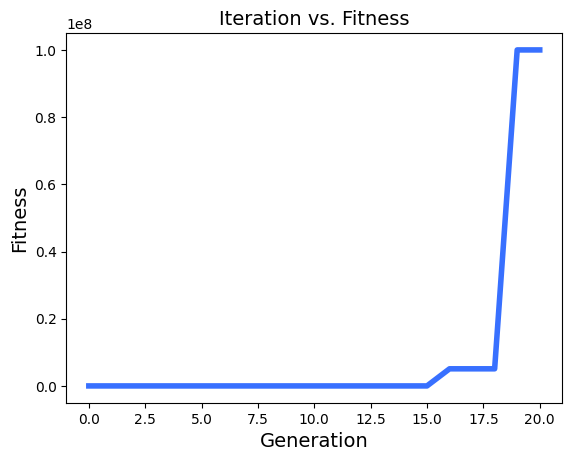

In [123]:
ga_instance.plot_fitness(title="Iteration vs. Fitness", linewidth=4)
plt.show()

In [124]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Fitness value of the best solution = 100000000.0
Index of the best solution : 0


In [125]:
# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)

In [126]:
predictions = model.predict(data_inputs)

In [130]:
predictions

array([[1.0000000e+00, 2.2676734e-11],
       [6.4408202e-37, 1.0000000e+00],
       [1.2317947e-17, 1.0000000e+00],
       [1.0000000e+00, 8.1607023e-09]], dtype=float32)

In [132]:
predictions.round(5)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [128]:
data_outputs

array([[1, 0],
       [0, 1],
       [0, 1],
       [1, 0]])